In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[1].shape

(28, 28)

In [5]:
x_train[1]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

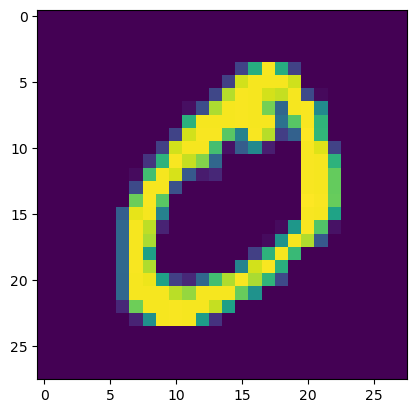

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [7]:
y_train[1]

0

In [8]:
# Normalize pixel values to [0, 1] and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

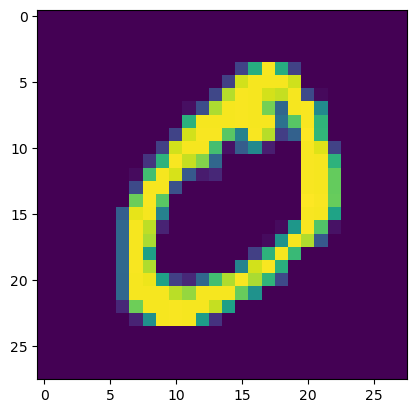

In [10]:
plt.imshow(x_train[1])

In [11]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Split train_full into train and val
x_val = x_train[50000:]
y_val = y_train[50000:]

In [14]:
x_val.shape, y_val.shape

((10000, 28, 28), (10000, 10))

In [15]:
x_train = x_train[:50000]
y_train = y_train[:50000]

In [16]:
x_train.shape, y_train.shape

((50000, 28, 28), (50000, 10))

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

In [30]:
for layer in model.layers:
    print(layer)

In [31]:
def flops(model):
    total_flops = 0

    for i, layer in enumerate(model.layers):
        if isinstance(layer, tf.keras.layers.Flatten):
            print(f'Layer {i}: Flatten — no FLOPs counted.')
            continue
        
        elif isinstance(layer, tf.keras.layers.Dense):
            print(f'Layer {i}: Dense')
            input_units = layer.input_shape[-1]
            output_units = layer.units
            flops = 2 * input_units * output_units  # Multiply-accumulate
            print(f'  input_units: {input_units}, output_units: {output_units}, flops: {flops}')

            # Activation function (approximate, optional)
            if layer.activation == tf.keras.activations.relu:
                flops += output_units  # 1 op per unit
                print(f'  +ReLU activation FLOPs: {output_units}')
            elif layer.activation == tf.keras.activations.softmax:
                flops += 5 * output_units  # exp, sum, divide
                print(f'  +Softmax activation FLOPs (approx): {5 * output_units}')
            
            total_flops += flops

    print(f"\nTotal estimated FLOPs: {total_flops:,}")
    return total_flops

flops(model)

Layer 0: Flatten — no FLOPs counted.
Layer 1: Dense
  input_units: 784, output_units: 100, flops: 156800
  +ReLU activation FLOPs: 100
Layer 2: Dense
  input_units: 100, output_units: 100, flops: 20000
  +ReLU activation FLOPs: 100
Layer 3: Dense
  input_units: 100, output_units: 10, flops: 2000
  +Softmax activation FLOPs (approx): 50

Total estimated FLOPs: 179,050


179050

In [ ]:
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test accuracy: {test_accuracy}')

In [ ]:
# model.summary()

In [ ]:
# !pip install psutil


In [ ]:
# import psutil
# import os

# def print_ram_usage():
#     process = psutil.Process(os.getpid())
#     ram_in_MB = process.memory_info().rss / (1024 ** 2)
#     print(f"RAM usage: {ram_in_MB:.2f} MB")

# def print_gpu_usage():
#     gpus = tf.config.experimental.list_physical_devices('GPU')
#     if gpus:
#         for gpu in gpus:
#             mem_info = tf.config.experimental.get_memory_info(gpu.name)
#             print(f"GPU {gpu.name} memory info: {mem_info}")
#     else:
#         print("No GPU found.")

# print("Before training:")
# print_ram_usage()
# print_gpu_usage()

# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# print("After training:")
# print_ram_usage()
# print_gpu_usage()


In [ ]:
# import psutil
# import os


# class ResourceMonitorCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         process = psutil.Process(os.getpid())
#         ram_in_MB = process.memory_info().rss / (1024 ** 2)
#         cpu_percent = psutil.cpu_percent(interval=0.1)  # short sampling interval
        
#         print(f"Epoch {epoch + 1} ended - RAM usage: {ram_in_MB:.2f} MB, CPU usage: {cpu_percent:.1f}%")

# # Use it during training:
# resource_monitor = ResourceMonitorCallback()

# model.fit(
#     x_train, y_train, 
#     epochs=10, 
#     batch_size=32, 
#     validation_data=(x_val, y_val),
#     callbacks=[resource_monitor]
# )


In [ ]:
import time
import psutil
import os
import matplotlib.pyplot as plt
import tensorflow as tf

class ResourceMonitorCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.ram_usage = []
        self.cpu_usage = []
        self.epoch_times = []
        self._start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self._start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        end_time = time.time()
        duration = end_time - self._start_time

        process = psutil.Process(os.getpid())
        ram = process.memory_info().rss / (1024 ** 2)
        cpu = psutil.cpu_percent(interval=0.1)

        self.ram_usage.append(ram)
        self.cpu_usage.append(cpu)
        self.epoch_times.append(duration)

        print(f"Epoch {epoch + 1} ended - RAM: {ram:.2f} MB, CPU: {cpu:.1f}%, Time: {duration:.2f}s")

    def on_train_end(self, logs=None):
        epochs = range(1, len(self.ram_usage) + 1)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 3, 1)
        plt.plot(epochs, self.ram_usage, marker='o', color='blue')
        plt.title("RAM Usage per Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("RAM (MB)")

        plt.subplot(1, 3, 2)
        plt.plot(epochs, self.cpu_usage, marker='o', color='green')
        plt.title("CPU Usage per Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("CPU (%)")

        plt.subplot(1, 3, 3)
        plt.plot(epochs, self.epoch_times, marker='o', color='red')
        plt.title("Time per Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Time (s)")

        plt.tight_layout()
        plt.show()


In [ ]:
resource_monitor = ResourceMonitorCallback()

model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[resource_monitor]
)
